**Installing PyTesseract**

In [ ]:
# Installing PyTesseract

!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 40 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 20s (244 kB/s)
debconf: unable to initia

**Importing Libraries**

In [ ]:
# Importing Libraries

import cv2
import numpy as np
from matplotlib import pyplot as plt
import imutils
import pytesseract


**Importing images**

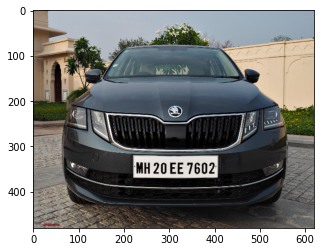

In [ ]:
# Importing images

img = cv2.imread ("car.jpg")
imgr = cv2.resize(img, (620,480) )
plt.imshow(cv2.cvtColor(imgr, cv2.COLOR_BGR2RGB)) 
plt.show()

**Grayscaling the image**

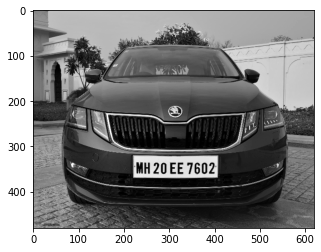

In [ ]:
# Grayscaling the image
gray = cv2.cvtColor(imgr, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.gray()

**Canny Edge Detection**

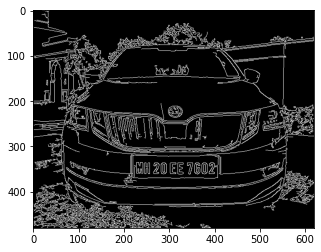

In [ ]:
# Canny Edge Detection

imgCanny = cv2.Canny(gray, 45, 450)
plt.imshow(imgCanny)
plt.show()

**Contour detection**

In [ ]:
contours=cv2.findContours(imgCanny.copy(),cv2.RETR_TREE,
                                            cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours = sorted(contours,key=cv2.contourArea, reverse = True)[:10]
screenCnt = None


In [ ]:
for c in contours:
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.018 * peri, True)
    # if our approximated contour has four points, then
    # we can assume that we have found our screen
    if len(approx) == 4:
        screenCnt = approx
        break

**Masking the part other than the number plate**

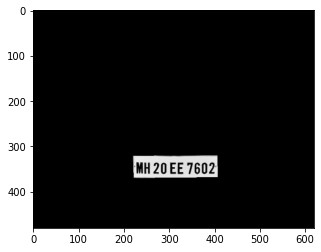

In [ ]:
# Masking the part other than the number plate
if screenCnt is None:
    detected = 0
    print ("No contour detected")
else:
     detected = 1

if detected == 1:
    cv2.drawContours(img, [screenCnt], -1, (0, 0, 255), 3)

mask = np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[screenCnt],0,255,-1,)
new_image = cv2.bitwise_and(gray,gray,mask=mask)
plt.imshow(new_image)
plt.show()

In [ ]:
(x, y) = np.where(mask == 255)
(topx, topy) = (np.min(x), np.min(y))
(bottomx, bottomy) = (np.max(x), np.max(y))
Cropped = gray[topx:bottomx+1, topy:bottomy+1]

**Returning number on license plate**

In [ ]:
text = pytesseract.image_to_string(Cropped, config='--psm 11')
print("programming_fever's License Plate Recognition\n")
print("Detected license plate Number is:",text)
img = cv2.resize(img,(500,300))
Cropped = cv2.resize(Cropped,(400,200))

programming_fever's License Plate Recognition

Detected license plate Number is: MH 20 EE 7602

